<a href="https://colab.research.google.com/github/Writuraj/AI-ML-starting/blob/main/CarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (3).csv


In [2]:
df=pd.read_csv('data.csv')

In [3]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [4]:
df.columns=df.columns.str.lower().str.replace(' ','_')

In [5]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [6]:
df.dtypes=='object'

,0
make,True
model,True
year,False
engine_fuel_type,True
engine_hp,False
engine_cylinders,False
transmission_type,True
driven_wheels,True
number_of_doors,False
market_category,True


In [7]:
df.dtypes[df.dtypes=='object']

,0
make,object
model,object
engine_fuel_type,object
transmission_type,object
driven_wheels,object
market_category,object
vehicle_size,object
vehicle_style,object


In [8]:
strings=list(df.dtypes[df.dtypes=='object'].index)

In [9]:
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [10]:
for col in strings :
    df[col]=df[col].str.lower().str.replace(' ','_')


In [11]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


# 2.1 Exploratory Data Analysis

In [12]:
for col in df.columns:
    print(col)
    print(df[col].head())
    print()

make
0    bmw
1    bmw
2    bmw
3    bmw
4    bmw
Name: make, dtype: object

model
0    1_series_m
1      1_series
2      1_series
3      1_series
4      1_series
Name: model, dtype: object

year
0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64

engine_fuel_type
0    premium_unleaded_(required)
1    premium_unleaded_(required)
2    premium_unleaded_(required)
3    premium_unleaded_(required)
4    premium_unleaded_(required)
Name: engine_fuel_type, dtype: object

engine_hp
0    335.0
1    300.0
2    300.0
3    230.0
4    230.0
Name: engine_hp, dtype: float64

engine_cylinders
0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: engine_cylinders, dtype: float64

transmission_type
0    manual
1    manual
2    manual
3    manual
4    manual
Name: transmission_type, dtype: object

driven_wheels
0    rear_wheel_drive
1    rear_wheel_drive
2    rear_wheel_drive
3    rear_wheel_drive
4    rear_wheel_drive
Name: driven_wheels, dtype: object

number_of_doors
0    2.0
1   

In [13]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

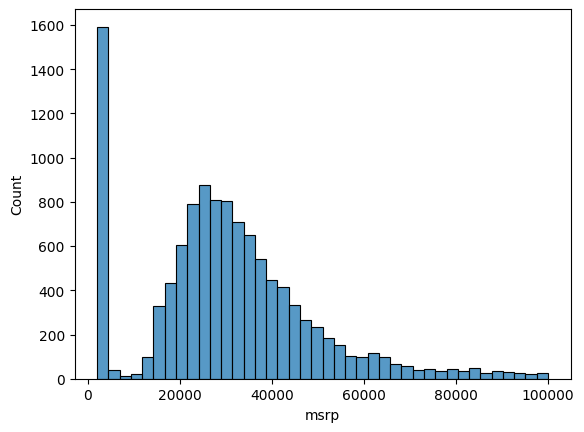

In [127]:
sns.histplot(df.msrp[df.msrp<100000],bins=40)

In [16]:
df.isnull().sum()

,0
make,0
model,0
year,0
engine_fuel_type,3
engine_hp,69
engine_cylinders,30
transmission_type,0
driven_wheels,0
number_of_doors,6
market_category,3742


# Validation Framework

In [17]:
len(df)

11914

In [18]:
n=len(df)

n_val=int(len(df)*0.2)
n_test=int(len(df)*0.2)
n_train= n-n_test-n_val

In [20]:
n,n_test+n_val+n_train

(11914, 11914)

In [128]:
print(n_train,n_val,n_test)

7150 2382 2382


In [19]:
df_val = df.iloc[:n_val]
df_test = df.iloc[n_val:n_val+n_test]
df_train=df.iloc[n_val+n_test:]

## shuffling

In [21]:
idx=np.arange(n)

In [22]:
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [23]:
np.random.seed(2)
np.random.shuffle(idx)

In [24]:
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [129]:

df_val = df.iloc[idx[:n_val]]
df_test = df.iloc[idx[n_val:n_val+n_test]]
df_train=df.iloc[idx[n_val+n_test:]]

In [26]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
8597,kia,rondo,2008,regular_unleaded,162.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,wagon,26,19,1720,16395
6408,subaru,legacy,2016,regular_unleaded,175.0,4.0,automatic,all_wheel_drive,4.0,NaN,midsize,sedan,36,26,640,24145
11241,hyundai,veloster,2016,regular_unleaded,132.0,4.0,manual,front_wheel_drive,3.0,hatchback,compact,2dr_hatchback,35,27,1439,18000
569,fiat,500,2017,premium_unleaded_(recommended),101.0,4.0,automatic,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,33,27,819,15990
1659,lincoln,aviator,2005,premium_unleaded_(required),302.0,8.0,automatic,all_wheel_drive,4.0,luxury,midsize,4dr_suv,16,11,61,43585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385,2052
11798,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640,25995
6637,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851,29100
2575,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202,22200


In [27]:
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [28]:
y_train=np.log1p(df_train.msrp.values) #log1px mane log(1+x) scarcity komano
y_val=np.log1p(df_val.msrp.values)
y_test=np.log1p(df_test.msrp.values)

In [29]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [30]:
len(df_train)

7150

In [31]:
len(y_train)

7150

# Linear Regression From Scratch

In [32]:
df_train.iloc[7145]

,7145
make,chevrolet
model,chevy_van
year,1998
engine_fuel_type,regular_unleaded
engine_hp,200.0
engine_cylinders,6.0
transmission_type,automatic
driven_wheels,rear_wheel_drive
number_of_doors,3.0
market_category,NaN


In [33]:
xi=[200,13,1385]

In [34]:
w0=7.17
w=[0.01,0.04,0.002]

#Linear Regression from Vector

In [35]:
w_new=[w0]+w

In [36]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [37]:
def dot (xi,w):
    n=len(xi)
    res=0.0
    for j in range (n):
        res=res+xi[j]*w[j]
    return res

In [38]:
def linear_regression(xi):
    xi=[1]+xi
    return dot(xi,w_new)

In [39]:
linear_regression(xi)

12.459999999999999

In [40]:
np.expm1(12.45)

np.float64(255249.32262933443)

In [41]:
np.log1p(255249.32262933443)

np.float64(12.45)

In [42]:
xi = [200, 13, 1385]

w0 = 7.17

w = [0.01, 0.04, 0.002]

# Train Linear Regression

In [43]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]

X = np.array(X)

In [44]:
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [45]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],
]
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [46]:

y = [10000, 20000, 15000, 25000, 10000, 20000, 10050, 20050, 12000]

In [47]:
ones = np.ones(X.shape[0])

In [48]:
X = np.column_stack([ones, X])

In [49]:
XTX = X.T.dot(X)

In [50]:
XTX_inv = np.linalg.inv(XTX)

In [51]:
w_full = XTX_inv.dot(X.T).dot(y)

In [134]:
w_full

array([ 2.83892227e+04, -1.65155959e+01, -3.17659766e+02, -1.17832899e+00])

In [53]:
w0 = w_full[0]
w = w_full[1:]

In [133]:
w0

np.float64(28389.22269772522)

In [132]:
w

array([ 1.67370410e-03,  1.12257369e-01, -7.15228446e-03, -5.98952352e-05,
       -5.66884857e-03, -9.64891380e-02, -7.26494570e-01, -8.78320896e-01,
       -5.67356187e-01, -4.53201110e-02,  2.29955830e-01,  3.32965934e-02,
        4.57851955e-04, -1.15927647e-01, -2.28966696e-01, -5.96458230e-01,
       -2.71909403e-01, -3.17460691e-01, -3.36662524e-01, -4.23851988e-01,
        1.04949354e-01, -2.88808041e-01, -4.91209540e-01, -1.63516491e-02,
        1.07103096e+00,  8.70834456e-01,  1.13659208e+00,  2.73903022e+00,
        4.92536618e-01,  1.62368455e+00,  1.51624098e+00,  1.61023266e+00,
        1.55986761e+00, -8.51551267e-02,  1.07811073e-01, -3.56702322e-02,
       -8.22310614e-03, -2.03701866e-02,  2.17137517e+00,  2.05882720e+00,
        2.07981927e+00, -6.96832930e-02,  4.49359972e-03,  1.80305294e-01,
        3.61544898e-01, -1.66329755e-01])

In [54]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return  w_full[0],w_full[1:]

In [55]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],
]
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [56]:
train_linear_regression(X,y)

(np.float64(28389.22269772522),
 array([ -16.51559586, -317.65976634,   -1.17832899]))

# Car price prediction baseline model

In [57]:
df_train.dtypes

,0
make,object
model,object
year,int64
engine_fuel_type,object
engine_hp,float64
engine_cylinders,float64
transmission_type,object
driven_wheels,object
number_of_doors,float64
market_category,object


In [58]:
base=['engine_hp','engine_cylinders','highway_mpg','popularity','city_mpg']
X_train = df_train[base].values

In [59]:
X_train

array([[ 162.,    4.,   26., 1720.,   19.],
       [ 175.,    4.,   36.,  640.,   26.],
       [ 132.,    4.,   35., 1439.,   27.],
       ...,
       [ 250.,    6.,   22., 1851.,   15.],
       [ 174.,    4.,   42., 2202.,   31.],
       [ 256.,    6.,   27.,  640.,   20.]])

In [60]:
y_train

array([ 9.70479268, 10.09187401,  9.79818259, ..., 10.27852782,
       10.00789261, 10.40414162])

In [61]:
train_linear_regression(X_train,y_train)

(np.float64(nan), array([nan, nan, nan, nan, nan]))

In [62]:
df_train[base].isnull().sum()

,0
engine_hp,43
engine_cylinders,20
highway_mpg,0
popularity,0
city_mpg,0


In [63]:
X_train=df_train[base].fillna(0).values

In [64]:
X_train

array([[ 162.,    4.,   26., 1720.,   19.],
       [ 175.,    4.,   36.,  640.,   26.],
       [ 132.,    4.,   35., 1439.,   27.],
       ...,
       [ 250.,    6.,   22., 1851.,   15.],
       [ 174.,    4.,   42., 2202.,   31.],
       [ 256.,    6.,   27.,  640.,   20.]])

In [65]:
train_linear_regression(X_train,y_train)

(np.float64(7.963556475095157),
 array([ 9.20710435e-03, -1.38559726e-01,  1.61265908e-02, -1.11571602e-05,
         1.22881992e-02]))

In [66]:
W0,w=train_linear_regression(X_train,y_train)

In [67]:
W0,w

(np.float64(7.963556475095157),
 array([ 9.20710435e-03, -1.38559726e-01,  1.61265908e-02, -1.11571602e-05,
         1.22881992e-02]))

In [68]:
w

array([ 9.20710435e-03, -1.38559726e-01,  1.61265908e-02, -1.11571602e-05,
        1.22881992e-02])

In [69]:
y_pred=W0+X_train.dot(w)

In [70]:
y_pred

array([ 9.53444531,  9.9134707 ,  9.50481225, ...,  9.95243029,
       10.04503665, 10.16325819])

<Axes: ylabel='Count'>

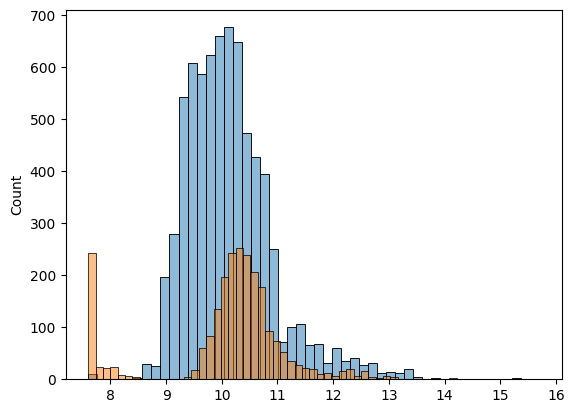

In [71]:
sns.histplot(y_pred,alpha=0.5,bins=50)
sns.histplot(y_val,alpha=0.5,bins=50)

## RMSE

In [72]:
def rmse(y,y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [73]:
rmse(y_train,y_pred)

np.float64(0.745130516822012)

In [74]:
y_train

array([ 9.70479268, 10.09187401,  9.79818259, ..., 10.27852782,
       10.00789261, 10.40414162])

In [75]:
y_pred

array([ 9.53444531,  9.9134707 ,  9.50481225, ...,  9.95243029,
       10.04503665, 10.16325819])

## validating model

In [76]:
base=['engine_hp','engine_cylinders','highway_mpg','popularity','city_mpg']
X_train = df_train[base].values
X_train=df_train[base].fillna(0).values
W0,w=train_linear_regression(X_train,y_train)
y_pred=W0+X_train.dot(w)


In [77]:
def prepare_x (df):
  df_num=df[base]
  df_num=df_num.fillna(0)
  X=df_num.values
  return X

In [78]:
X_train = prepare_x(df_train)
W0,w=train_linear_regression(X_train,y_train)

X_val = prepare_x(df_val)
y_pred=W0+X_val.dot(w)
rmse(y_val,y_pred)

np.float64(0.7419381478118938)

In [79]:
y_pred

array([ 9.58361063,  9.42525104,  9.70558187, ...,  9.99554516,
       10.6031682 ,  9.56418114])

# Simple Feature Engineering

In [80]:
def prepare_x (df):
  df=df.copy()
  features = base.copy()
  df['age']=2017-df.year
  features.append('age')

  for v in [2,3,4]:
    df['num_doors_%s'%v] = (df.number_of_doors == v).astype(int)
    features.append('num_doors_%s'%v)

  df_num=df[features]

  df_num=df_num.fillna(0)
  X=df_num.values
  return X

In [81]:
def prepare_x (df):
  df=df.copy()
  df['age']=2017-df.year
  feature = base + ['age']
  df_num=df[feature]
  df_num=df_num.fillna(0)
  X=df_num.values
  return X

In [82]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [83]:
X_train = prepare_x(df_train)
W0,w=train_linear_regression(X_train,y_train)

X_val = prepare_x(df_val)
y_pred=W0+X_val.dot(w)
rmse(y_val,y_pred)

np.float64(0.5222394405268976)

# Categorical valus

In [84]:
#caterogical values are objct type values

In [85]:
(df_train.number_of_doors == 2).astype(int)

,number_of_doors
0,0
1,0
2,0
3,1
4,0
...,...
7145,0
7146,0
7147,0
7148,0


In [86]:
for v in [2,3,4]:
  df_train['num_doors_%s'%v] = (df_train.number_of_doors == v).astype(int)


In [87]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,kia,rondo,2008,regular_unleaded,162.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,wagon,26,19,1720,0,0,1
1,subaru,legacy,2016,regular_unleaded,175.0,4.0,automatic,all_wheel_drive,4.0,NaN,midsize,sedan,36,26,640,0,0,1
2,hyundai,veloster,2016,regular_unleaded,132.0,4.0,manual,front_wheel_drive,3.0,hatchback,compact,2dr_hatchback,35,27,1439,0,1,0
3,fiat,500,2017,premium_unleaded_(recommended),101.0,4.0,automatic,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,33,27,819,1,0,0
4,lincoln,aviator,2005,premium_unleaded_(required),302.0,8.0,automatic,all_wheel_drive,4.0,luxury,midsize,4dr_suv,16,11,61,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385,0,1,0
7146,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640,0,0,1
7147,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851,0,0,1
7148,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202,0,0,1


In [88]:
def prepare_x(df):
    df = df.copy()
    features = base.copy()

    # add age
    df['age'] = 2017 - df.year
    features.append('age')

    # one-hot encode num_doors
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%s' % v)

    df_num = df[features].fillna(0)
    X = df_num.values
    return X


In [89]:
prepare_x(df_train)

array([[162.,   4.,  26., ...,   0.,   0.,   1.],
       [175.,   4.,  36., ...,   0.,   0.,   1.],
       [132.,   4.,  35., ...,   0.,   1.,   0.],
       ...,
       [250.,   6.,  22., ...,   0.,   0.,   1.],
       [174.,   4.,  42., ...,   0.,   0.,   1.],
       [256.,   6.,  27., ...,   0.,   0.,   1.]])

In [90]:
X_train = prepare_x(df_train)
W0,w=train_linear_regression(X_train,y_train)

X_val = prepare_x(df_val)
y_pred=W0+X_val.dot(w)
rmse(y_val,y_pred)

np.float64(0.5210137656823736)

In [91]:
makes = list(df.make.value_counts().head().index)

In [92]:
def prepare_x(df):
    df = df.copy()
    features = base.copy()

    # add age
    df['age'] = 2017 - df.year
    features.append('age')

    # one-hot encode num_doors
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%s' % v)
    for v in makes:
        df['make_%s' % v] = (df.make == v).astype(int)
        features.append('make_%s' % v)

    df_num = df[features].fillna(0)
    X = df_num.values
    return X


In [93]:
X_train = prepare_x(df_train)
W0,w=train_linear_regression(X_train,y_train)

X_val = prepare_x(df_val)
y_pred=W0+X_val.dot(w)
rmse(y_val,y_pred)

np.float64(0.5100789886283497)

In [94]:
df_train.dtypes

,0
make,object
model,object
year,int64
engine_fuel_type,object
engine_hp,float64
engine_cylinders,float64
transmission_type,object
driven_wheels,object
number_of_doors,float64
market_category,object


In [95]:
categorical_columns = ['make',
'model',
'engine_fuel_type',
'transmission_type',
'driven_wheels',
'market_category',
'vehicle_size',
'vehicle_style']

In [96]:
categories = {}
for c in categorical_columns:
  categories[c]=list(df[c].value_counts().head().index)

In [97]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'model': ['silverado_1500',
  'tundra',
  'f-150',
  'sierra_1500',
  'beetle_convertible'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [98]:
def prepare_x(df):
    df = df.copy()
    features = base.copy()

    # add age
    df['age'] = 2017 - df.year
    features.append('age')

    # one-hot encode num_doors
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
    for c,values in categories.items():
        for v in values :
          df['%s_%s' % (c,v)] = (df[c] == v).astype('int')
          features.append('%s_%s' % (c,v))

    df_num = df[features].fillna(0)
    X = df_num.values
    return X

In [99]:
X_train = prepare_x(df_train)
W0,w=train_linear_regression(X_train,y_train)

X_val = prepare_x(df_val)
y_pred=W0+X_val.dot(w)
rmse(y_val,y_pred)

np.float64(831.125231245963)

In [100]:
X_train.shape

(7150, 46)

In [101]:
X_val.shape

(2382, 46)

In [102]:
W0

np.float64(-5.271526377320607e+16)

In [103]:
base

['engine_hp', 'engine_cylinders', 'highway_mpg', 'popularity', 'city_mpg']

In [104]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'model': ['silverado_1500',
  'tundra',
  'f-150',
  'sierra_1500',
  'beetle_convertible'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

# Singular matrix problem

In [105]:
A=[
    [4,4,4],
    [4,5,5],
    [4,1,1]
]
A=np.array(A)

In [106]:
A

array([[4, 4, 4],
       [4, 5, 5],
       [4, 1, 1]])

In [107]:
ATA = A.T.dot(A)

In [108]:
np.linalg.inv(ATA)

LinAlgError: Singular matrix

In [109]:
ATA = ATA + 0.01*np.eye(3)

In [110]:
ATA

array([[48.01, 40.  , 40.  ],
       [40.  , 42.01, 42.  ],
       [40.  , 42.  , 42.01]])

In [112]:
def train_linear_regression_reg(X,y,r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return  w_full[0],w_full[1:]

In [113]:
X_train = prepare_x(df_train)

W0,w=train_linear_regression_reg(X_train,y_train,r=0.01)

X_val = prepare_x(df_val)
y_pred=W0+X_val.dot(w)
rmse(y_val,y_pred)

np.float64(0.46334322993885035)

<Axes: ylabel='Count'>

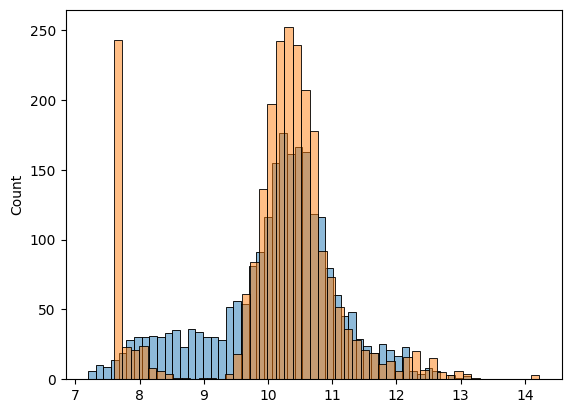

In [114]:
sns.histplot(y_pred,alpha=0.5,bins=50)
sns.histplot(y_val,alpha=0.5,bins=50)

## Tuning the model

In [115]:
for r in [0.01,0.0001,0.001,0.01,0.00000001,1] :

    X_train = prepare_x(df_train)

    W0,w=train_linear_regression_reg(X_train,y_train,r=r)

    X_val = prepare_x(df_val)
    y_pred=W0+X_val.dot(w)
    score = rmse(y_val,y_pred)
    print(r,W0,score)

0.01 6.296107395099281 0.46334322993885035
0.0001 6.362591415491349 0.46334354068789746
0.001 6.310541636859851 0.4633434550523889
0.01 6.296107395099281 0.46334322993885035
1e-08 -6496131.820488483 0.46338467999931743
1 5.455763733086303 0.4648773780371979


In [116]:

r = 0.01
X_train = prepare_x(df_train)

W0,w=train_linear_regression_reg(X_train,y_train,r=r)

X_val = prepare_x(df_val)
y_pred=W0+X_val.dot(w)
score = rmse(y_val,y_pred)
score

np.float64(0.46334322993885035)

# Using the model

In [117]:
df_full_train = pd.concat([df_train,df_val])

In [118]:
df_full_train = df_full_train.reset_index(drop=True)

In [119]:
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,kia,rondo,2008,regular_unleaded,162.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,wagon,26,19,1720,0.0,0.0,1.0
1,subaru,legacy,2016,regular_unleaded,175.0,4.0,automatic,all_wheel_drive,4.0,NaN,midsize,sedan,36,26,640,0.0,0.0,1.0
2,hyundai,veloster,2016,regular_unleaded,132.0,4.0,manual,front_wheel_drive,3.0,hatchback,compact,2dr_hatchback,35,27,1439,0.0,1.0,0.0
3,fiat,500,2017,premium_unleaded_(recommended),101.0,4.0,automatic,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,33,27,819,1.0,0.0,0.0
4,lincoln,aviator,2005,premium_unleaded_(required),302.0,8.0,automatic,all_wheel_drive,4.0,luxury,midsize,4dr_suv,16,11,61,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,infiniti,q50,2015,premium_unleaded_(recommended),328.0,6.0,automatic,all_wheel_drive,4.0,"luxury,high-performance",midsize,sedan,27,19,190,NaN,NaN,NaN
9528,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,2.0,flex_fuel,large,regular_cab_pickup,22,17,1385,NaN,NaN,NaN
9529,ford,fiesta,2016,regular_unleaded,197.0,4.0,manual,front_wheel_drive,4.0,"hatchback,factory_tuner,performance",compact,4dr_hatchback,32,26,5657,NaN,NaN,NaN
9530,mercedes-benz,e-class,2016,premium_unleaded_(required),302.0,6.0,automatic,all_wheel_drive,4.0,"luxury,performance",midsize,sedan,28,20,617,NaN,NaN,NaN


In [120]:
X_full_train = prepare_x(df_full_train)

In [121]:
X_full_train

array([[162.,   4.,  26., ...,   0.,   0.,   0.],
       [175.,   4.,  36., ...,   0.,   0.,   0.],
       [132.,   4.,  35., ...,   0.,   0.,   0.],
       ...,
       [197.,   4.,  32., ...,   0.,   0.,   1.],
       [302.,   6.,  28., ...,   0.,   0.,   0.],
       [210.,   6.,  20., ...,   0.,   0.,   0.]])

In [122]:
y_full_train = np.concatenate([y_train,y_val])

In [123]:
W0,w=train_linear_regression_reg(X_full_train,y_full_train,r=0.01)

In [124]:
w

array([ 1.67370410e-03,  1.12257369e-01, -7.15228446e-03, -5.98952352e-05,
       -5.66884857e-03, -9.64891380e-02, -7.26494570e-01, -8.78320896e-01,
       -5.67356187e-01, -4.53201110e-02,  2.29955830e-01,  3.32965934e-02,
        4.57851955e-04, -1.15927647e-01, -2.28966696e-01, -5.96458230e-01,
       -2.71909403e-01, -3.17460691e-01, -3.36662524e-01, -4.23851988e-01,
        1.04949354e-01, -2.88808041e-01, -4.91209540e-01, -1.63516491e-02,
        1.07103096e+00,  8.70834456e-01,  1.13659208e+00,  2.73903022e+00,
        4.92536618e-01,  1.62368455e+00,  1.51624098e+00,  1.61023266e+00,
        1.55986761e+00, -8.51551267e-02,  1.07811073e-01, -3.56702322e-02,
       -8.22310614e-03, -2.03701866e-02,  2.17137517e+00,  2.05882720e+00,
        2.07981927e+00, -6.96832930e-02,  4.49359972e-03,  1.80305294e-01,
        3.61544898e-01, -1.66329755e-01])

In [125]:
X_test = prepare_x(df_test)
y_pred=W0+X_test.dot(w)
score = rmse(y_test,y_pred)
score

np.float64(0.45896393343037134)

In [138]:
car=df_test.iloc[20].to_dict()

In [139]:
car

{'make': 'acura',
 'model': 'ilx',
 'year': 2017,
 'engine_fuel_type': 'premium_unleaded_(recommended)',
 'engine_hp': 201.0,
 'engine_cylinders': 4.0,
 'transmission_type': 'automated_manual',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'luxury',
 'vehicle_size': 'compact',
 'vehicle_style': 'sedan',
 'highway_mpg': 35,
 'city_mpg': 25,
 'popularity': 204,
 'msrp': 29290}

In [140]:
df_small = pd.DataFrame([car])

In [141]:
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,acura,ilx,2017,premium_unleaded_(recommended),201.0,4.0,automated_manual,front_wheel_drive,4.0,luxury,compact,sedan,35,25,204,29290


In [142]:
x_small=prepare_x(df_small)

In [143]:
y_pred=W0+x_small.dot(w)

In [144]:
y_pred

array([10.66132831])

In [146]:
np.expm1(y_pred)

array([42672.28291122])

In [148]:
np.expm1(y_test[20])

np.float64(29289.999999999978)